<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [6]:
import numpy as np
def sum_prod(X, V):
    '''
    X - список матриц размера (n, n)
    V - список векторов размера (n, 1)
    Гарантируется, что len(X) == len(V)
    ''' 
    if len(X) != len(V):
        raise ValueError("Количество матриц должно быть равно количеству векторов")
    
    # Инициализируем результат нулевой матрицей нужного размера
    n = X[0].shape[0]  # берем размерность из первой матрицы
    result = np.zeros((n, 1))
    
    # Для каждой пары матрица-вектор
    for i in range(len(X)):
        # Умножаем матрицу на вектор и добавляем к результату
        result += X[i] @ V[i]
    
    return result

import pytest

def test_sum_prod():
    # Тест 1: Простой случай с одной матрицей и вектором
    X1 = [np.array([[1, 0], 
                    [0, 1]])]  # Единичная матрица 2x2
    V1 = [np.array([[1], [2]])]        # Вектор [1, 2]
    assert np.array_equal(sum_prod(X1, V1), np.array([[1], [2]]))

    # Тест 2: Две матрицы и два вектора
    X2 = [
        np.array([[1, 0], 
                  [0, 1]]),    # Единичная матрица
        np.array([[0, 1], 
                  [1, 0]])     # Матрица перестановки
    ]
    V2 = [
        np.array([[1], [2]]),          # Первый вектор
        np.array([[3], [4]])           # Второй вектор
    ]
    assert np.array_equal(sum_prod(X2, V2), np.array([[5], [5]]))

        # Тест для 3x3 матриц
    X3 = [
        np.array([[1, 0, 0],           # Единичная матрица 3x3
                 [0, 1, 0],
                 [0, 0, 1]]),
        np.array([[0, 0, 1],           # Матрица перестановки
                 [1, 0, 0],
                 [0, 1, 0]])
    ]
    V3 = [
        np.array([[1], [2], [3]]),     # Первый вектор
        np.array([[4], [5], [6]])      # Второй вектор
    ]
    assert np.array_equal(sum_prod(X3, V3), np.array([[7], [6], [8]]))

    # Тест для 4x4 матриц
    X4 = [
        np.array([[1, 0, 0, 0],        # Единичная матрица 4x4
                 [0, 1, 0, 0],
                 [0, 0, 1, 0],
                 [0, 0, 0, 1]]),
        np.array([[2, 1, 0, 0],        # Произвольная матрица
                 [0, 2, 1, 0],
                 [0, 0, 2, 1],
                 [0, 0, 0, 2]])
    ]
    V4 = [
        np.array([[1], [2], [3], [4]]),    # Первый вектор
        np.array([[1], [1], [1], [1]])     # Второй вектор
    ]
    expected4 = np.array([[4], [5], [6], [6]])  # Результат сложения
    assert np.array_equal(sum_prod(X4, V4), expected4)

    # Тест 5: Проверка на len(X) != len(V)
    X5 = [np.array([[1, 0], 
                    [0, 1]])]
    V5 = [np.array([[1], [2], [3]])]
    with pytest.raises(ValueError):
        sum_prod(X5, V5)

test_sum_prod()
    

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [7]:
def binarize(M, threshold=0.5):
    
    
    return (M > threshold).astype(int)
    
    
import numpy as np

def test_binarize():
    
    # Тест 1: Простой случай с порогом 0.5
    M1 = np.array([[0.1, 0.6],
                   [0.3, 0.8]])
    expected1 = np.array([[0, 1],
                         [0, 1]])
    assert np.array_equal(binarize(M1), expected1)
    
    # Тест 2: Другой порог (0.3)
    M2 = np.array([[0.1, 0.6],
                   [0.3, 0.8]])
    expected2 = np.array([[0, 1],
                         [0, 1]])
    assert np.array_equal(binarize(M2, threshold=0.3), expected2)
    
    # Тест 3: Матрица 3x3
    M3 = np.array([[0.1, 0.6, 0.2],
                   [0.3, 0.8, 0.4],
                   [0.5, 0.7, 0.9]])
    expected3 = np.array([[0, 1, 0],
                         [0, 1, 0],
                         [0, 1, 1]])
    assert np.array_equal(binarize(M3), expected3)
    
    # Тест 4: Матрица с отрицательными значениями
    M4 = np.array([[-0.1, 0.6],
                   [0.3, -0.8]])
    expected4 = np.array([[0, 1],
                         [0, 0]])
    assert np.array_equal(binarize(M4), expected4)
    
    # Тест 5: Матрица с нулевыми значениями
    M5 = np.array([[0.0, 0.5],
                   [0.5, 0.0]])
    expected5 = np.array([[0, 0],
                         [0, 0]])
    assert np.array_equal(binarize(M5), expected5)

test_binarize()

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [8]:
import numpy as np
def unique_rows(mat):
    result = []
    
    for row in mat:
        unique_elements = np.unique(row)
        result.append(unique_elements)
    
    return result

def unique_columns(mat):
    # Транспонируем матрицу, чтобы столбцы стали строками
    return unique_rows(mat.T)

def test_unique_elements():
    
    # Тест 1: Простая матрица 2x2
    mat1 = np.array([[1, 1],
                     [1, 2]])
    # Проверяем строки
    rows1 = unique_rows(mat1)
    assert np.array_equal(rows1[0], [1])      # Первая строка: только 1
    assert np.array_equal(rows1[1], [1, 2])   # Вторая строка: 1 и 2
    
    # Проверяем столбцы
    cols1 = unique_columns(mat1)
    assert np.array_equal(cols1[0], [1])      # Первый столбец: только 1
    assert np.array_equal(cols1[1], [1, 2])   # Второй столбец: 1 и 2
    
    # Тест 2: Матрица 3x3 с повторяющимися элементами
    mat2 = np.array([[1, 2, 2],
                     [3, 3, 4],
                     [1, 2, 1]])
    
    # Проверяем строки
    rows2 = unique_rows(mat2)
    assert np.array_equal(rows2[0], [1, 2])   # Первая строка: 1, 2
    assert np.array_equal(rows2[1], [3, 4])   # Вторая строка: 3, 4
    assert np.array_equal(rows2[2], [1, 2])   # Третья строка: 1, 2
    
    # Проверяем столбцы
    cols2 = unique_columns(mat2)
    assert np.array_equal(cols2[0], [1, 3])   # Первый столбец: 1, 3
    assert np.array_equal(cols2[1], [2, 3])   # Второй столбец: 2, 3
    assert np.array_equal(cols2[2], [1, 2, 4]) # Третий столбец: 1, 2, 4
    
    # Тест 3: Матрица с float значениями
    mat3 = np.array([[1.1, 1.1, 2.2],
                     [3.3, 3.3, 3.3]])
    
    # Проверяем строки
    rows3 = unique_rows(mat3)
    assert np.array_equal(rows3[0], [1.1, 2.2])  # Первая строка: 1.1, 2.2
    assert np.array_equal(rows3[1], [3.3])       # Вторая строка: только 3.3
    
    # Проверяем столбцы
    cols3 = unique_columns(mat3)
    assert np.array_equal(cols3[0], [1.1, 3.3])  # Первый столбец: 1.1, 3.3
    assert np.array_equal(cols3[1], [1.1, 3.3])  # Второй столбец: 1.1, 3.3
    assert np.array_equal(cols3[2], [2.2, 3.3])  # Третий столбец: 2.2, 3.3

test_unique_elements()

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

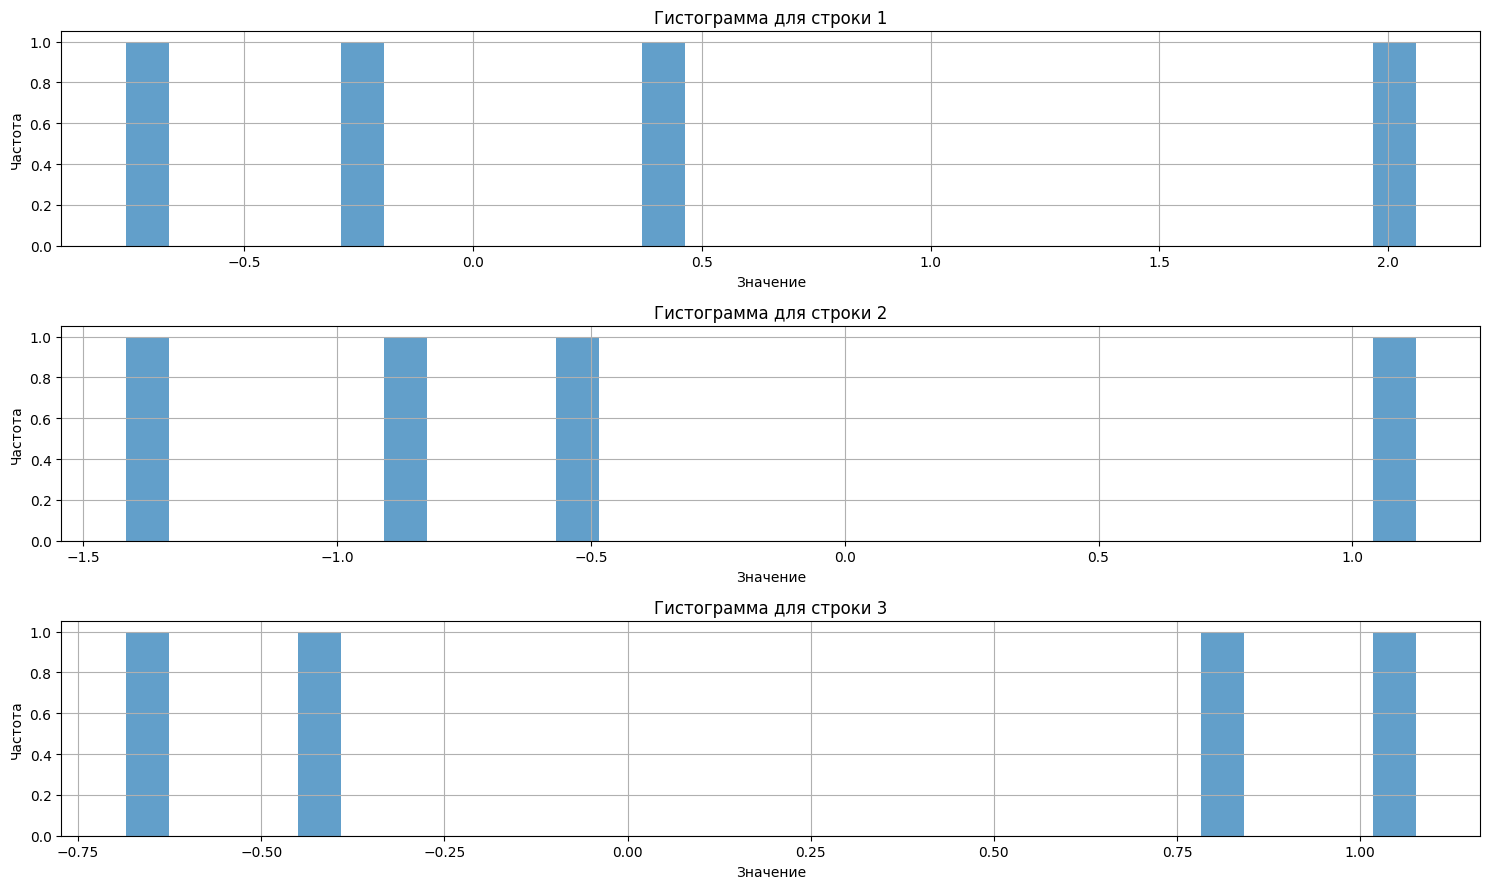

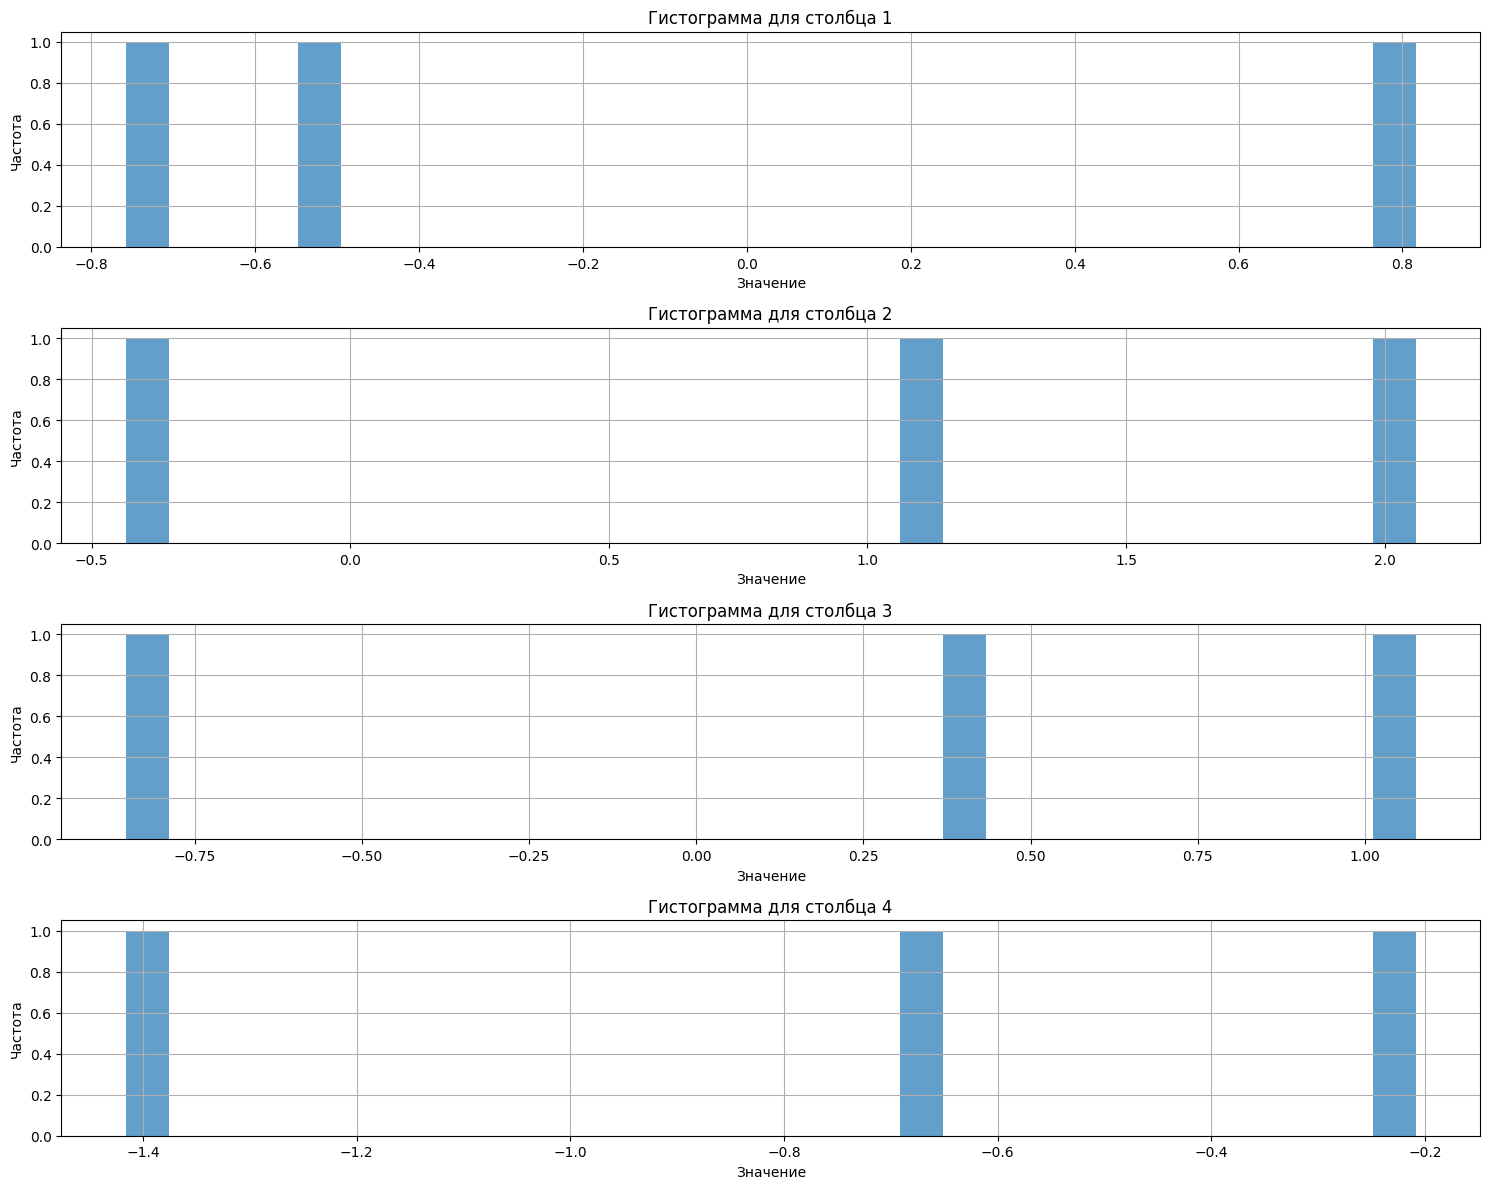

(array([[-0.75798339,  2.05937686,  0.37410105, -0.20904305],
        [-0.51223983,  1.12434239, -0.85285021, -1.41605613],
        [ 0.816009  , -0.43386376,  1.07550167, -0.68490353]]),
 array([ 0.36661287, -0.41420095,  0.19318585]),
 array([1.11540062, 0.89321356, 0.58265551]),
 array([-0.15140474,  0.9166185 ,  0.1989175 , -0.7700009 ]),
 array([0.47800965, 1.05761607, 0.63510147, 0.24643421]))

In [10]:
import numpy as np
import matplotlib.pyplot as plt
def analyze_random_matrix(m, n):
    matrix = np.random.normal(loc=0, scale=1, size=(m, n))
    
    # Вычисляем статистики для строк
    row_means = np.mean(matrix, axis=1)  # axis=1 - вдоль строк
    row_vars = np.var(matrix, axis=1)    # Вычисляем дисперсию для строк
    
    # Вычисляем статистики для столбцов
    col_means = np.mean(matrix, axis=0)  # axis=0 - вдоль столбцов
    col_vars = np.var(matrix, axis=0)    # Вычисляем дисперсию для столбцов
    
    # Строим гистограммы для строк
    plt.figure(figsize=(15, m*3)) 
    for i in range(m):
        plt.subplot(m, 1, i+1)  # Создаем подграфик для каждой строки
        plt.hist(matrix[i, :], bins=30, alpha=0.7)
        plt.title(f'Гистограмма для строки {i+1}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(True)
    plt.tight_layout()  # Автоматически регулируем расположение подграфиков
    plt.show()
    
    # Строим гистограммы для столбцов
    plt.figure(figsize=(15, n*3))
    for j in range(n):
        plt.subplot(n, 1, j+1)  # Создаем подграфик для каждого столбца
        plt.hist(matrix[:, j], bins=30, alpha=0.7)
        plt.title(f'Гистограмма для столбца {j+1}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return matrix, row_means, row_vars, col_means, col_vars

analyze_random_matrix(3, 4)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [1]:
import numpy as np
def chess(m, n, a, b):
    matrix = np.zeros((m, n))
    
    # Заполняем матрицу в шахматном порядке
    # Используем сумму индексов: если она четная - a, если нечетная - b
    for i in range(m):
        for j in range(n):
            matrix[i, j] = a if (i + j) % 2 == 0 else b
            
    return matrix

print("\nПримеры матриц:")
print("\nМатрица 3x4 с числами 1 и 0:")
print(chess(3, 4, 1, 0))

print("\nМатрица 4x4 с числами 5 и -5:")
print(chess(4, 4, 5, -5))

def test_chess_matrix():
    import numpy as np
    
    # Тест 1: Простая матрица 2x2
    mat1 = chess(2, 2, 1, 0)
    expected1 = np.array([[1, 0],
                         [0, 1]])
    assert np.array_equal(mat1, expected1)
    
    # Тест 2: Прямоугольная матрица 2x3
    mat2 = chess(2, 3, 1, 0)
    expected2 = np.array([[1, 0, 1],
                         [0, 1, 0]])
    assert np.array_equal(mat2, expected2)
    
    # Тест 3: Матрица 3x3
    mat3 = chess(3, 3, 1, -1)
    expected3 = np.array([[ 1, -1,  1],
                         [-1,  1, -1],
                         [ 1, -1,  1]])
    assert np.array_equal(mat3, expected3)
    
    # Тест 4: Матрица с float числами
    mat4 = chess(2, 2, 1.5, 2.5)
    expected4 = np.array([[1.5, 2.5],
                         [2.5, 1.5]])
    assert np.array_equal(mat4, expected4)
    
    # Тест 5: Матрица 1x1
    mat5 = chess(1, 1, 1, 0)
    expected5 = np.array([[1]])
    assert np.array_equal(mat5, expected5)
    
test_chess_matrix()




Примеры матриц:

Матрица 3x4 с числами 1 и 0:
[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]]

Матрица 4x4 с числами 5 и -5:
[[ 5. -5.  5. -5.]
 [-5.  5. -5.  5.]
 [ 5. -5.  5. -5.]
 [-5.  5. -5.  5.]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

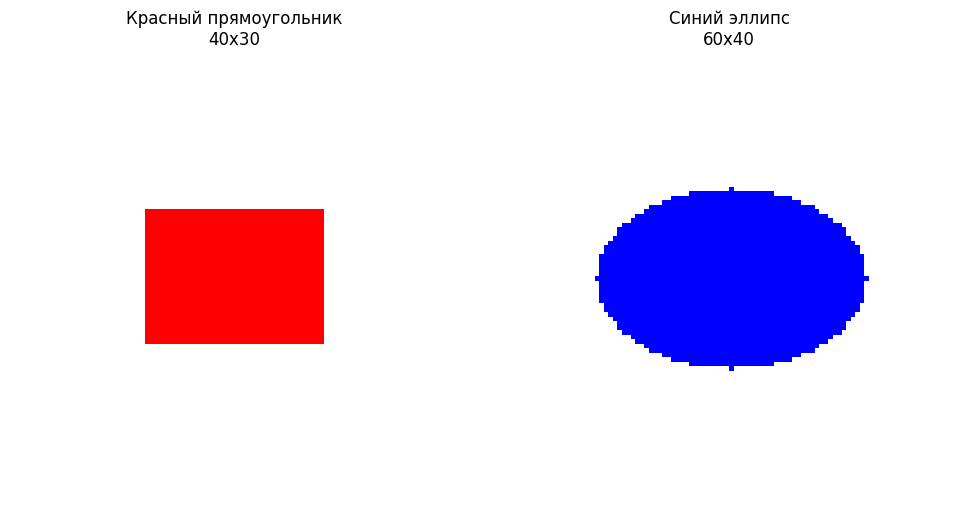

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    # Создаем изображение с фоновым цветом
    img = np.zeros((m, n, 3))
    img[:,:] = background_color  # заполняем фон
    
    # Вычисляем координаты для центрирования прямоугольника
    x_start = (n - a) // 2
    y_start = (m - b) // 2
    x_end = x_start + a
    y_end = y_start + b
    
    # Проверяем границы
    x_start = max(0, x_start)
    y_start = max(0, y_start)
    x_end = min(n, x_end)
    y_end = min(m, y_end)
    
    # Рисуем прямоугольник
    img[y_start:y_end, x_start:x_end] = rectangle_color
    
    return img

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
     # Создаем изображение с фоновым цветом
     
    # Создаем изображение с фоновым цветом
    img = np.zeros((m, n, 3))
    img[:,:] = background_color
    
    # Создаем сетку координат
    y, x = np.ogrid[:m, :n]
    center_x = n // 2
    center_y = m // 2
    
    # Вычисляем полуоси
    rx = a / 2
    ry = b / 2
    
    # Создаем маску эллипса с учетом центра и размеров
    ellipse_mask = ((x - center_x)**2 / (rx**2) + 
                    (y - center_y)**2 / (ry**2) <= 1)
    
    # Рисуем эллипс
    img[ellipse_mask] = ellipse_color
    
    return img
def test_shapes():
    
    # Тест прямоугольника
    rect = draw_rectangle(40, 30, 100, 100, 
                         rectangle_color=(1,0,0),  # красный
                         background_color=(1,1,1)) # белый
    
    # Тест эллипса
    ellipse = draw_ellipse(60, 40, 100, 100,
                          ellipse_color=(0,0,1),  # синий
                          background_color=(1,1,1)) # белый
    
    # Отображаем результаты
    plt.figure(figsize=(15, 5))
    
    plt.subplot(131)
    plt.imshow(rect)
    plt.title('Красный прямоугольник\n40x30')
    plt.axis('off')
    
    plt.subplot(132)
    plt.imshow(ellipse)
    plt.title('Синий эллипс\n60x40')
    plt.axis('off')
    
    
    plt.tight_layout()
    plt.show()

    
test_shapes()
    

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [5]:
import numpy as np
def analyze_time_series(series, window_size):
    # Базовые статистики
    mean = np.mean(series)
    variance = np.var(series)
    std = np.std(series)
    
    # Находим локальные максимумы и минимумы
    # Исключаем крайние точки из рассмотрения
    local_max_idx = []
    local_min_idx = []
    
    for i in range(1, len(series)-1):
        if series[i] > series[i-1] and series[i] > series[i+1]:
            local_max_idx.append(i)
        if series[i] < series[i-1] and series[i] < series[i+1]:
            local_min_idx.append(i)
    
    # Вычисляем скользящее среднее
    moving_average = np.convolve(series, 
                                np.ones(window_size)/window_size, 
                                mode='valid')
    
    return {
        'mean': mean,
        'variance': variance,
        'std': std,
        'local_maxima': list(zip(local_max_idx, series[local_max_idx])),
        'local_minima': list(zip(local_min_idx, series[local_min_idx])),
        'moving_average': moving_average
    }

def test_time_series_analysis():
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Создаем тестовый временной ряд
    x = np.linspace(0, 4*np.pi, 100)
    series = np.sin(x) + 0.1*np.random.randn(len(x))
    
    # Анализируем ряд
    results = analyze_time_series(series, window_size=5)
    
    # Проверяем результаты
    assert isinstance(results['mean'], float)
    assert isinstance(results['variance'], float)
    assert isinstance(results['std'], float)
    assert len(results['local_maxima']) > 0
    assert len(results['local_minima']) > 0
    assert len(results['moving_average']) == len(series) - 4  # для window_size=5
    
test_time_series_analysis()

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [7]:
import numpy as np
def one_hot_encoding(labels):
    
    # Преобразуем входной вектор в numpy массив
    labels = np.array(labels)

     # Проверяем, пустой ли массив
    if labels.size == 0:
        return np.empty((0, 0))  # Возвращаем пустую матрицу
    
    # Находим количество уникальных классов
    num_classes = np.max(labels) + 1  # +1, так как классы начинаются с 0
    
    # Создаем матрицу нулей размера (количество меток, количество классов)
    one_hot_matrix = np.zeros((labels.size, num_classes))
    
    # Заполняем матрицу единицами в соответствующих позициях
    one_hot_matrix[np.arange(labels.size), labels] = 1
    
    return one_hot_matrix

def test_one_hot_encoding():

    # Тест 1: Простой случай
    labels1 = [0, 2, 3, 0]
    expected1 = np.array([[1, 0, 0, 0],
                          [0, 0, 1, 0],
                          [0, 0, 0, 1],
                          [1, 0, 0, 0]])
    result1 = one_hot_encoding(labels1)
    assert np.array_equal(result1, expected1)
    
    # Тест 2: Смешанные метки
    labels2 = [1, 0, 2, 1, 3]
    expected2 = np.array([[0, 1, 0, 0],
                          [1, 0, 0, 0],
                          [0, 0, 1, 0],
                          [0, 1, 0, 0],
                          [0, 0, 0, 1]])
    result2 = one_hot_encoding(labels2)
    assert np.array_equal(result2, expected2)
    
    # Тест 3: Все метки одинаковые
    labels3 = [2, 2, 2]
    expected3 = np.array([[0, 0, 1],
                          [0, 0, 1],
                          [0, 0, 1]])
    result3 = one_hot_encoding(labels3)
    assert np.array_equal(result3, expected3)
    
    # Тест 4: Пустой вектор
    labels4 = []
    expected4 = np.array([]).reshape(0, 0)  # Пустая матрица
    result4 = one_hot_encoding(labels4)
    assert np.array_equal(result4, expected4)


test_one_hot_encoding()